In [8]:
# ----------------------------------------------------------
# COMP 542 – Machine Learning
# Class Number # 17086
# Group Project by: Jonathan Cordova and Phani Challabotla
# DATA PREPROCESSING FOR PRESENTATION #1 for Stock Price Prediction
# ----------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [9]:
# !pip install yfinance

In [10]:
# Install ta-lib via cmd:
# conda install -c conda-forge ta-lib

In [11]:
import yfinance as yf
import talib as ta

In [12]:
# get the s&p 500 index fund data
stock_data = yf.Ticker("^GSPC")

# get historical price data for s&p 500
hist_stock = stock_data.history(period="max")
df = pd.DataFrame(hist_stock)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,0.0,0.0
2024-05-31 00:00:00-04:00,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,0.0,0.0
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,0.0,0.0


In [13]:
# Using info method to get a quick desc of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24223 entries, 1927-12-30 00:00:00-05:00 to 2024-06-05 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24223 non-null  float64
 1   High          24223 non-null  float64
 2   Low           24223 non-null  float64
 3   Close         24223 non-null  float64
 4   Volume        24223 non-null  int64  
 5   Dividends     24223 non-null  float64
 6   Stock Splits  24223 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [14]:
# Information for numerical attributes (features)
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,24223.000000,24223.000000,24223.000000,24223.000000,2.422300e+04,24223.0,24223.0
mean,608.486018,632.010680,624.420343,628.461900,9.016099e+08,0.0,0.0
std,1027.374863,1021.910299,1010.335870,1016.514065,1.614918e+09,0.0,0.0
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,9.670000,24.634999,24.634999,24.634999,1.520000e+06,0.0,0.0
50%,42.419998,102.860001,101.269997,102.089996,2.015000e+07,0.0,0.0
75%,1018.940002,1026.184998,1008.739990,1019.500000,9.560500e+08,0.0,0.0
max,5340.259766,5354.160156,5302.399902,5354.029785,1.145623e+10,0.0,0.0


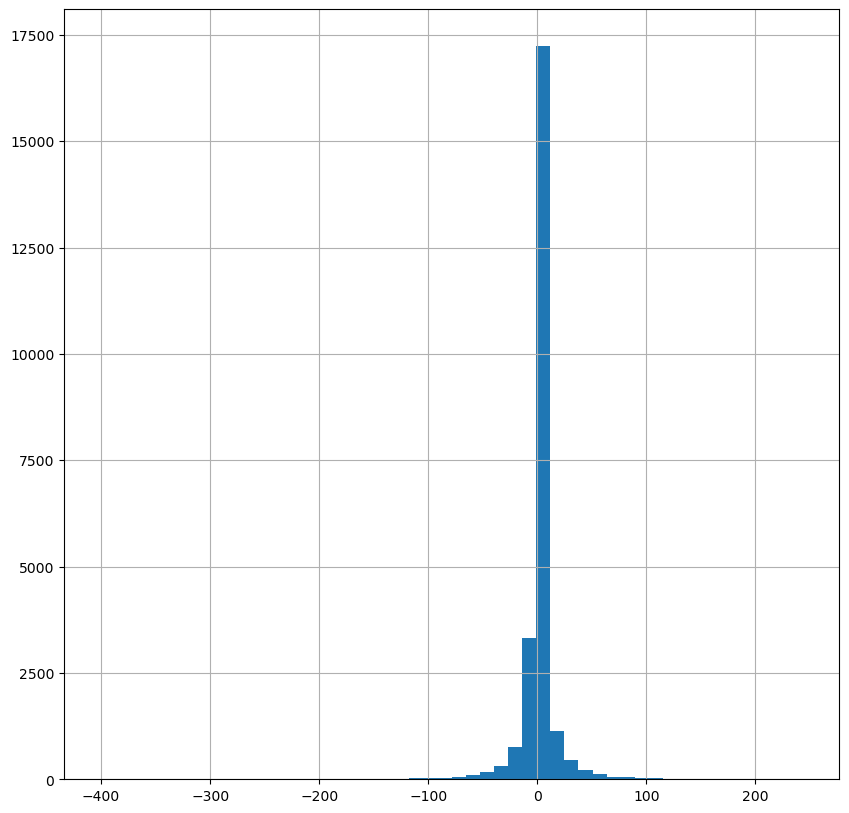

In [15]:
# Calculating Momentum (Technical Indicator) and add new data column
df['Momentum_Indicator'] = ta.MOM(hist_stock['Close'], timeperiod=2)
# Histogram for attribute of the new feature added
df['Momentum_Indicator'].hist(bins=50, figsize=(10, 10))
plt.show()

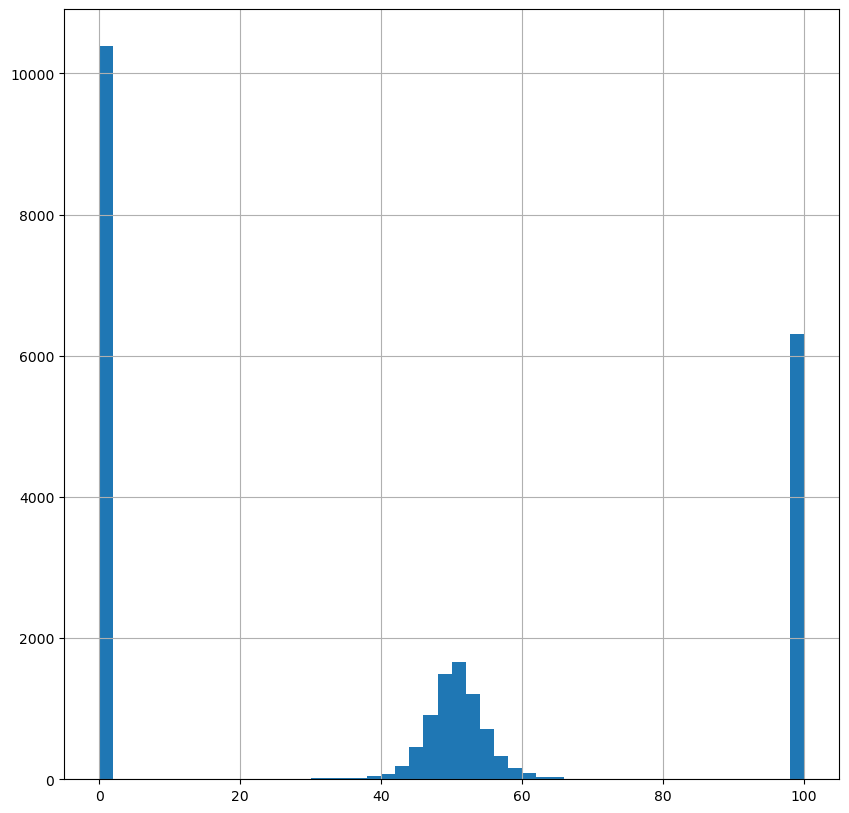

In [16]:
# Calculating Money Flow Index (Technical Indicator) and add new data column
df['Money_Flow_Index'] = ta.MFI(hist_stock['High'], hist_stock['Low'], hist_stock['Close'], hist_stock['Volume'], timeperiod=2)
# Histogram for attribute of the new feature added
df['Money_Flow_Index'].hist(bins=50, figsize=(10, 10))
plt.show()

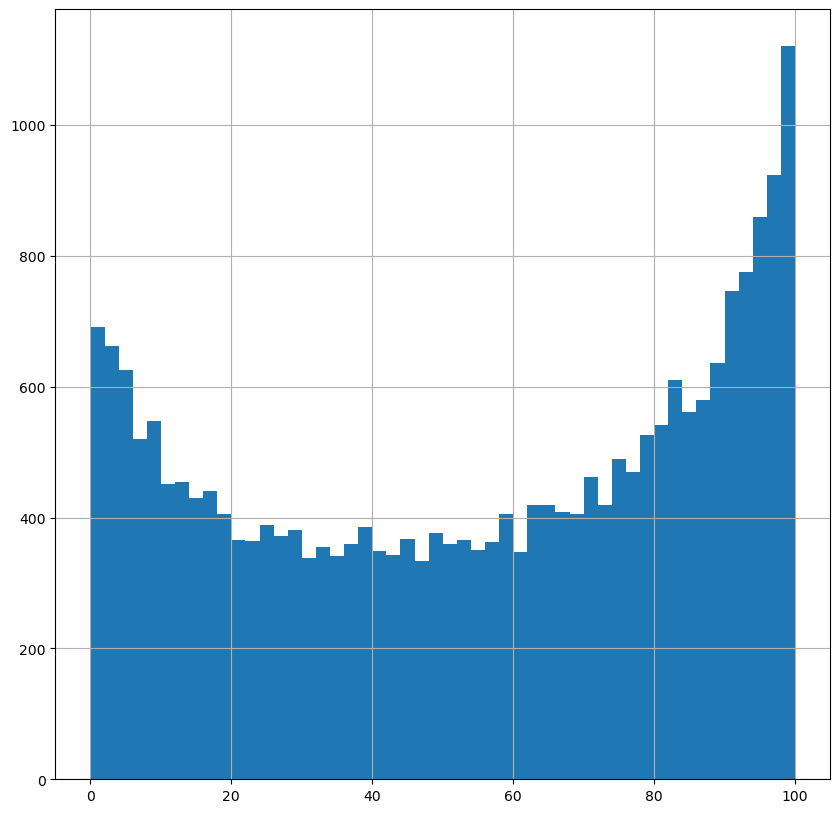

In [17]:
# Calculating Relative Strength Index (Technical Indicator) and add new data column
df['Relative_Strength_Index'] = ta.RSI(df['Close'], timeperiod=2)
# Histogram for attribute of the new feature added
df['Relative_Strength_Index'].hist(bins=50, figsize=(10, 10))
plt.show()

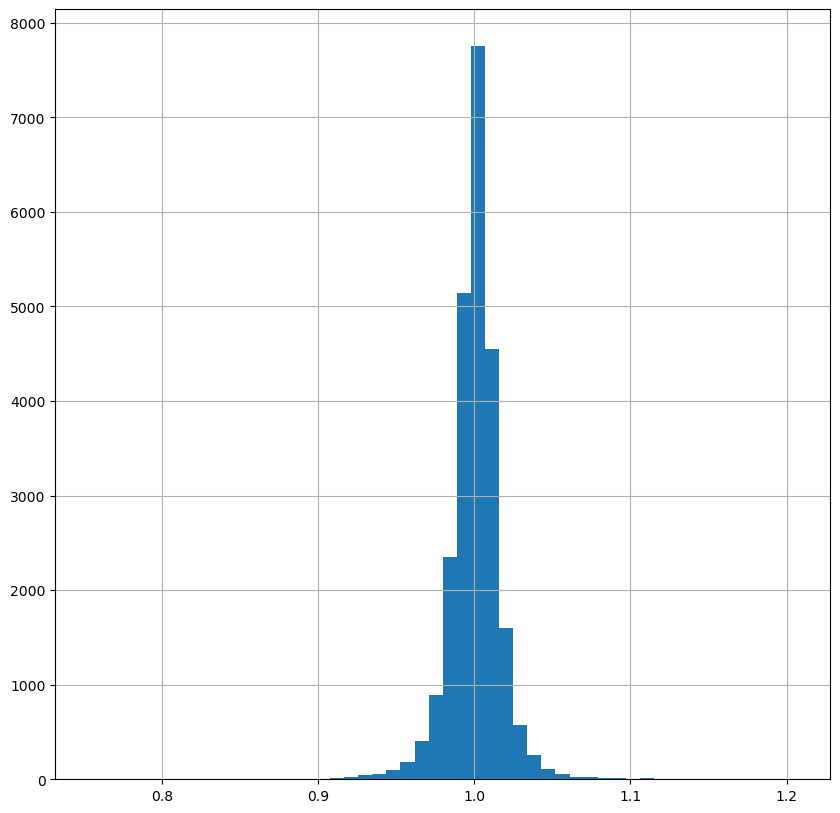

In [18]:
# Calculating Rate of Change (Technical Indicator) and add new data column
df['Rate_of_Change_Ratio'] = ta.ROCR(df['Close'], timeperiod=2)
# Histogram for attribute of the new feature added
df['Rate_of_Change_Ratio'].hist(bins=50, figsize=(10, 10))
plt.show()

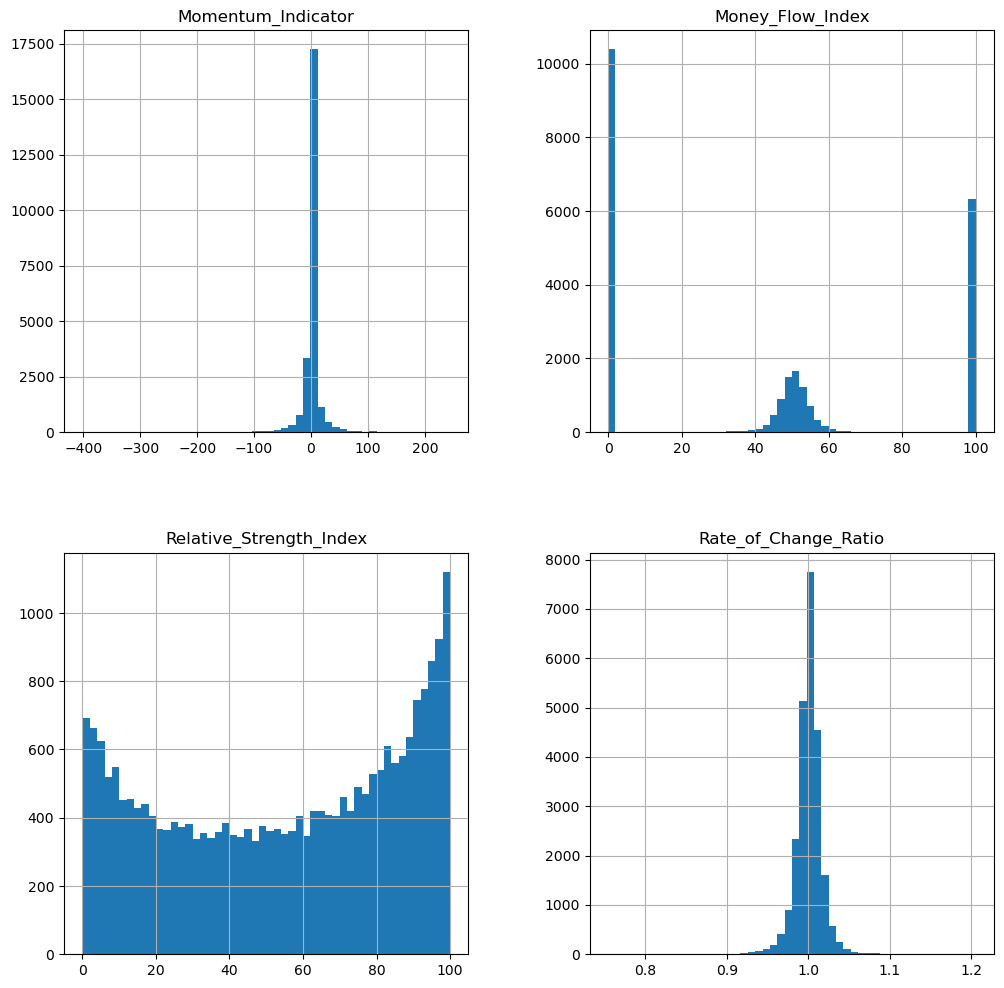

In [19]:
# Histogram for attributes of the new features added together
df[['Momentum_Indicator', 'Money_Flow_Index', 'Relative_Strength_Index', 'Rate_of_Change_Ratio']].hist(bins=50, figsize=(12, 12))
plt.show()

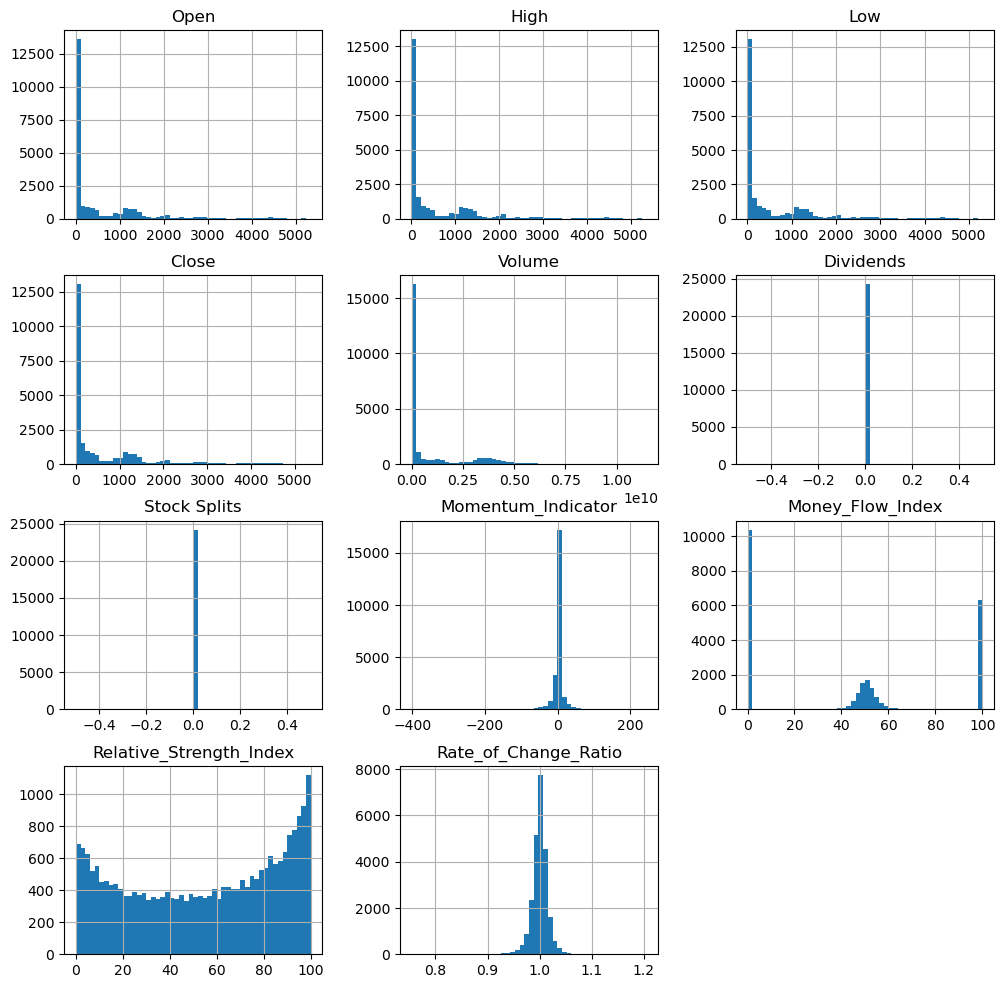

In [20]:
# Histogram for all attributes
df.hist(bins=50, figsize=(12, 12))
plt.show()

In [21]:
# All information for numerical attributes after feature engineering
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
count,24223.000000,24223.000000,24223.000000,24223.000000,2.422300e+04,24223.0,24223.0,24221.000000,2.422100e+04,24221.000000,24221.000000
mean,608.486018,632.010680,624.420343,628.461900,9.016099e+08,0.0,0.0,0.438048,4.176940e+01,54.399819,1.000612
std,1027.374863,1021.910299,1010.335870,1016.514065,1.614918e+09,0.0,0.0,17.743405,4.078446e+01,32.147038,0.016775
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0,-401.590088,-3.881771e-13,0.007275,0.754294
25%,9.670000,24.634999,24.634999,24.634999,1.520000e+06,0.0,0.0,-0.590000,0.000000e+00,24.563102,0.993073
50%,42.419998,102.860001,101.269997,102.089996,2.015000e+07,0.0,0.0,0.059998,4.793112e+01,58.100062,1.001076
75%,1018.940002,1026.184998,1008.739990,1019.500000,9.560500e+08,0.0,0.0,1.020004,1.000000e+02,84.588199,1.008690
max,5340.259766,5354.160156,5302.399902,5354.029785,1.145623e+10,0.0,0.0,244.359863,1.000000e+02,99.997889,1.205310


In [22]:
# Checking for NaN values
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
Date,,,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,NaN,NaN,NaN,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,NaN,NaN,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,0.059999,0.000000e+00,71.428182,1.003397
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,-0.210001,0.000000e+00,20.833350,0.988176
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,-0.059999,0.000000e+00,58.695711,0.996614
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,0.0,0.0,-70.560059,-1.008515e-13,8.925012,0.986702
2024-05-31 00:00:00-04:00,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,0.0,0.0,10.559570,5.879144e+01,62.356835,1.002005
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,0.0,0.0,47.919922,1.000000e+02,67.672643,1.009153


In [23]:
# Dropping all NaN rows
df.dropna(subset=['Momentum_Indicator', 'Money_Flow_Index', 'Relative_Strength_Index', 'Rate_of_Change_Ratio'], inplace=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
Date,,,,,,,,,,,
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,0.059999,0.000000e+00,71.428182,1.003397
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,-0.210001,0.000000e+00,20.833350,0.988176
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,-0.059999,0.000000e+00,58.695711,0.996614
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0,-0.049999,0.000000e+00,24.545553,0.997151
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0,-0.289999,0.000000e+00,12.616920,0.983579
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,0.0,0.0,-70.560059,-1.008515e-13,8.925012,0.986702
2024-05-31 00:00:00-04:00,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,0.0,0.0,10.559570,5.879144e+01,62.356835,1.002005
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,0.0,0.0,47.919922,1.000000e+02,67.672643,1.009153


In [24]:
# Drop columns Stock Splits and Dividends, axis = 1 represents column
df = df.drop(['Stock Splits', 'Dividends'], axis=1)
df

,Open,High,Low,Close,Volume,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
Date,,,,,,,,,
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.059999,0.000000e+00,71.428182,1.003397
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,-0.210001,0.000000e+00,20.833350,0.988176
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,-0.059999,0.000000e+00,58.695711,0.996614
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,-0.049999,0.000000e+00,24.545553,0.997151
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,-0.289999,0.000000e+00,12.616920,0.983579
...,...,...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,-70.560059,-1.008515e-13,8.925012,0.986702
2024-05-31 00:00:00-04:00,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,10.559570,5.879144e+01,62.356835,1.002005
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,47.919922,1.000000e+02,67.672643,1.009153


In [25]:
# Show the Money Flow Index indicator information
df['Money_Flow_Index']

Date
1928-01-04 00:00:00-05:00    0.000000e+00
1928-01-05 00:00:00-05:00    0.000000e+00
1928-01-06 00:00:00-05:00    0.000000e+00
1928-01-09 00:00:00-05:00    0.000000e+00
1928-01-10 00:00:00-05:00    0.000000e+00
                                 ...     
2024-05-30 00:00:00-04:00   -1.008515e-13
2024-05-31 00:00:00-04:00    5.879144e+01
2024-06-03 00:00:00-04:00    1.000000e+02
2024-06-04 00:00:00-04:00    1.000000e+02
2024-06-05 00:00:00-04:00    1.000000e+02
Name: Money_Flow_Index, Length: 24221, dtype: float64

In [26]:
# Format the Money Flow Index Indicator column and plot
df['Money_Flow_Index'] = df['Money_Flow_Index'].round(6)
df

,Open,High,Low,Close,Volume,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
Date,,,,,,,,,
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.059999,0.000000,71.428182,1.003397
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,-0.210001,0.000000,20.833350,0.988176
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,-0.059999,0.000000,58.695711,0.996614
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,-0.049999,0.000000,24.545553,0.997151
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,-0.289999,0.000000,12.616920,0.983579
...,...,...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,-70.560059,-0.000000,8.925012,0.986702
2024-05-31 00:00:00-04:00,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,10.559570,58.791444,62.356835,1.002005
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,47.919922,100.000000,67.672643,1.009153


In [27]:
# Turns Date index into a feature (column)
df = df.reset_index()

# Filter data between two dates
filtered_df = df.loc[(df['Date'] >= '2012-10-01')
                     & (df['Date'] <= '2022-10-01')]

# Resets the row index to 0
filtered_df = filtered_df.reset_index(drop=True)

# Makes the Date column back into an index 
filtered_df = filtered_df.set_index('Date')
df = filtered_df
df

,Open,High,Low,Close,Volume,Momentum_Indicator,Money_Flow_Index,Relative_Strength_Index,Rate_of_Change_Ratio
Date,,,,,,,,,
2012-10-01 00:00:00-04:00,1440.900024,1457.140015,1440.900024,1444.489990,3505080000,-2.660034,50.080793,57.694852,0.998162
2012-10-02 00:00:00-04:00,1444.989990,1451.520020,1439.010010,1445.750000,3321790000,5.079956,51.378397,64.726274,1.003526
2012-10-03 00:00:00-04:00,1446.050049,1454.300049,1441.989990,1450.989990,3531640000,6.500000,51.594261,85.194092,1.004500
2012-10-04 00:00:00-04:00,1451.079956,1463.140015,1451.079956,1461.400024,3615860000,15.650024,100.000000,95.520875,1.010825
2012-10-05 00:00:00-04:00,1461.400024,1470.959961,1456.890015,1460.930054,3172940000,9.940063,100.000000,89.861698,1.006851
...,...,...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,3682.719971,3715.669922,3644.760010,3655.040039,4886140000,-102.949951,-0.000000,1.057540,0.972605
2022-09-27 00:00:00-04:00,3686.439941,3717.530029,3623.290039,3647.290039,4577740000,-45.939941,-0.000000,0.904572,0.987561
2022-09-28 00:00:00-04:00,3651.939941,3736.739990,3640.610107,3719.040039,4684850000,64.000000,50.823289,73.059277,1.017510


In [28]:
attributes = ["Close", "Volume", "Momentum_Indicator",
              "Money_Flow_Index", "Relative_Strength_Index", "Rate_of_Change_Ratio"]
seaborn.set_theme(style="ticks")
seaborn.pairplot(df[attributes], markers=["o", "x", "D", "+", "s"], diag_kind="hist")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Correlation between Momentum and Rate of Change
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.scatterplot(data=df, x="Momentum_Indicator", y="Rate_of_Change_Ratio", s=50, ax=ax)

In [ ]:
corr_matrix = df.corr()
corr_matrix["Momentum_Indicator"].sort_values(ascending=False)